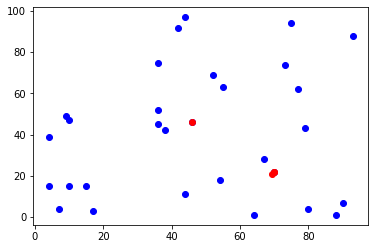

4


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, clear_output

class Point:
    def __init__(self, x, y):
        self.x=x
        self.y=y
        self.cluster= -1
        self.previous_c= -1
        
    def set_cluster(self, number=-1):
        self.previous_c=self.cluster
        self.cluster = number
        
def dist(p1, p2):#расстояние между точками
     return np.sqrt((p1.x-p2.x)**2+(p1.y-p2.y)**2)
    
def randomPoints(n):#рандом точек
    points=[]
    for i in range(n):
        points.append(Point(np.random.randint(0,100), np.random.randint(0,100)))
    return points
                        
def get_probabilities(points, centroids):#коэф-ты принадлежности
    m = 2
    sum=0
    
    N = len(points)
    M = len(centroids)
    matrix = [ [0]*M for i in range(N) ]
    #matrix = [[0]*len(centroids)]*len(points)
    for  i in range(len(points)):
        for j in range(len(centroids)):
            matrix[i][j]=dist(points[i], centroids[j])**(2/(1-m))
            sum+=matrix[i][j]
        for j in range(len(centroids)):
            matrix[i][j]/=sum
        
    return matrix

def get_criterian(points, centroids, matrix):#решающая функция
    criterian=0
    for  i in range(len(points)):
        for j in range(len(centroids)):
            criterian+=dist(points[i], centroids[j])*matrix[i][j]
    return criterian

def init_matrix(points, n):#начальное заполнение матрицы  
    n=n-1
    matrix = [ [0]*n for i in range(len(points)) ]
    for  i in range(len(points)):
        for j in range(n):
            matrix[i][j]=np.random.random(1)[0]
    return matrix
    

def get_cent(matrix, m, points):#центры
    arr=[]
    for j in range(len(points)-1):
        temp_x1=0
        temp_x2=0
        temp_y1=0
        temp_y2=0
        for i in range(len (points)):
            temp_x1+=matrix[i][j]**m
            temp_x2+=(matrix[i][j]**m)*points[i].x
            temp_y1+=matrix[i][j]**m
            temp_y2+=(matrix[i][j]**m)*points[i].y
        arr.append(Point(temp_x2/temp_x1, temp_y2/temp_y1))
    return arr

    
    
if __name__=="__main__":
    
   
    n=30
    k=3
    eps=0.5
    points=randomPoints(n)
    matrix=init_matrix(points, n)
    print(matrix)
    count=1
    criterians=[]
    centroids= []
    cluster_count=0
    
    fig = plt.figure()
    
    ax = fig.add_subplot(1, 1, 1) 
    
    
    while count<n:
        clear_output(wait = True)
        ax.cla()
    
        
        ax.scatter(list(map(lambda point: point.x, points )),
               list(map(lambda point: point.y, points)), color = 'b')
        #print(matrix)
        
        centroids = get_cent(matrix, 2, points)#находим центры
        
        centroids_c = centroids[0:count]
        ax.scatter(list(map(lambda point: point.x, centroids_c )),
               list(map(lambda point: point.y, centroids_c)), color = 'r')
        
        matrix = get_probabilities(points, centroids)
        
        criterians.append(get_criterian(points, centroids, matrix))
        
        if count>1:
            if abs(criterians[count-1]-criterians[count-2])<eps:
                   break
           
                   
        display(fig)
        clear_output(wait = True)
        plt.pause(1)
        count+=1
    #print(criterians)
    display(fig)
    print(count)
    